Please upload AMD Excel file


Saving AMD.xlsx to AMD.xlsx
Please upload INTC Excel file


Saving INTC.xlsx to INTC.xlsx

AMD DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
INTC DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
Please enter the column name containing closing prices:  Close

Unit Root Tests for AMD:
ADF Test:
ADF Statistic: -1.6869
p-value: 0.4379
Critical Values: {'1%': -3.4499043309021955, '5%': -2.870154885338925, '10%': -2.5713597190254385}

KPSS Test:
KPSS Statistic: 0.7111
p-value: 0.0125
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Unit Root Tests for INTC:
ADF Test:
ADF Statistic: -1.1420
p-value: 0.6980
Critical Values: {'1%': -3.4499043309021955, '5%': -2.870154885338925, '10%': -2.5713597190254385}

KPSS Test:
KPSS Statistic: 2.4983
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-1-bd6e0342408d>:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c')  # 'c' for constant (default)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be 


Best ARMA model for AMD:
Order: (0, 0, 0)
AIC: 1971.13


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot


Best ARMA model for INTC:
Order: (2, 0, 2)
AIC: 959.92

Johansen Cointegration Test:
Trace statistic: [8.37583255 2.82142363]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
r = 0: No cointegration at 95% confidence level
r = 1: No cointegration at 95% confidence level


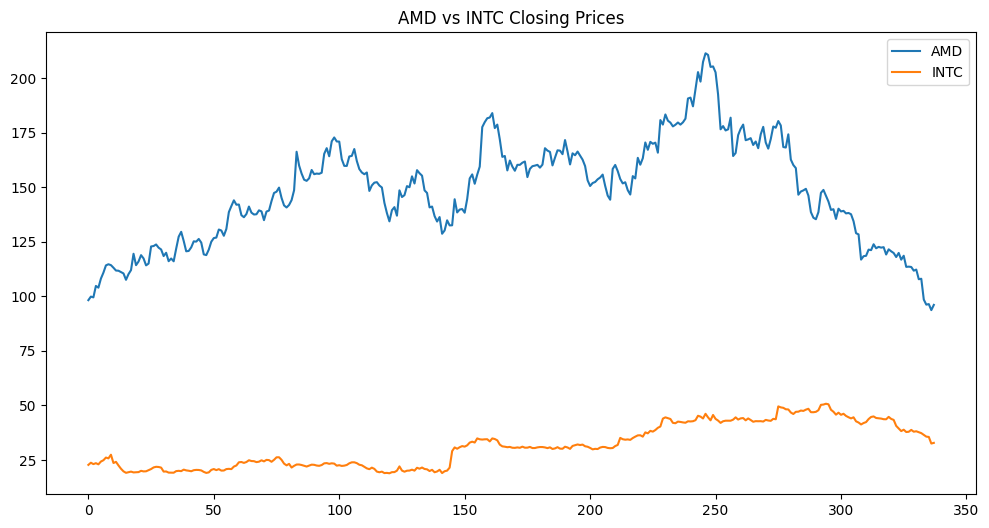

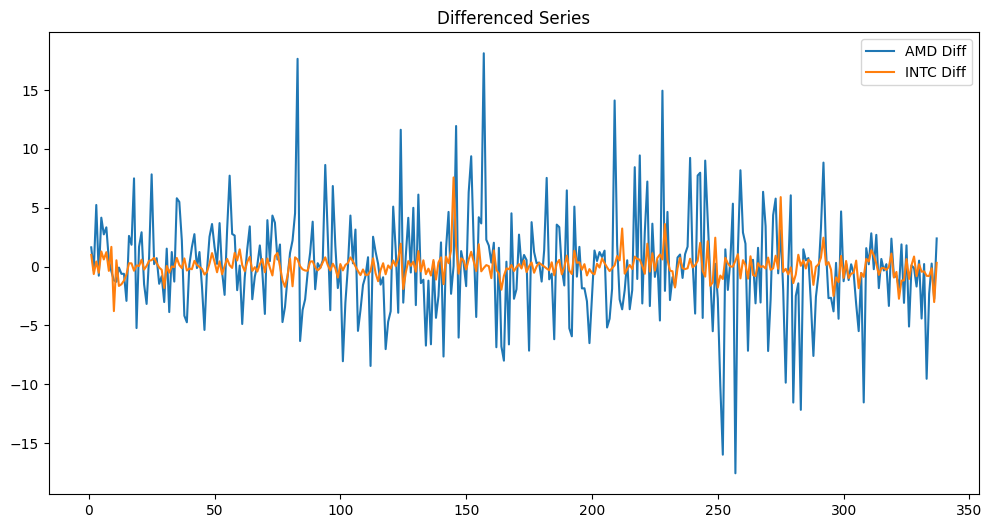

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Upload Excel files
print("Please upload AMD Excel file")
amd_upload = files.upload()
amd_filename = list(amd_upload.keys())[0]
amd_df = pd.read_excel(amd_filename)

print("Please upload INTC Excel file")
intc_upload = files.upload()
intc_filename = list(intc_upload.keys())[0]
intc_df = pd.read_excel(intc_filename)

# Print available columns
print("\nAMD DataFrame columns:", list(amd_df.columns))
print("INTC DataFrame columns:", list(intc_df.columns))

# Ask user for the correct column name
close_column = input("Please enter the column name containing closing prices: ")

# Extract closing prices using user-specified column name
try:
    amd_close = amd_df[close_column]
    intc_close = intc_df[close_column]
except KeyError:
    print(f"Error: Column '{close_column}' not found in one or both DataFrames")
    print("Please check the column names and try again")
    raise

# Ensure both series have the same length
min_length = min(len(amd_close), len(intc_close))
amd_close = amd_close[:min_length]
intc_close = intc_close[:min_length]

# Function for unit root tests
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')

    # KPSS Test
    kpss_result = kpss(series, regression='c')  # 'c' for constant (default)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')

# Perform unit root tests
unit_root_tests(amd_close, "AMD")
unit_root_tests(intc_close, "INTC")

# Difference the series if non-stationary
amd_diff = amd_close.diff().dropna()
intc_diff = intc_close.diff().dropna()

# Function to find best ARMA model (using ARIMA with d=0)
def find_best_arma(series, name, max_p=3, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                model = ARIMA(series, order=(p, 0, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, 0, q)
            except:
                continue

    print(f"\nBest ARMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")

    best_model = ARIMA(series, order=best_order).fit()
    return best_model

# Fit ARMA models to differenced series
amd_arma = find_best_arma(amd_diff, "AMD")
intc_arma = find_best_arma(intc_diff, "INTC")

# Cointegration test
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")

    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:  # 95% critical value
            print(f"r = {i}: Cointegration exists at 95% confidence level")
        else:
            print(f"r = {i}: No cointegration at 95% confidence level")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'AMD': amd_close,
    'INTC': intc_close
}).dropna()

# Run cointegration test
cointegration_test(coint_df)

# Plot the series
plt.figure(figsize=(12,6))
plt.plot(amd_close, label='AMD')
plt.plot(intc_close, label='INTC')
plt.title('AMD vs INTC Closing Prices')
plt.legend()
plt.show()

# Plot the differenced series
plt.figure(figsize=(12,6))
plt.plot(amd_diff, label='AMD Diff')
plt.plot(intc_diff, label='INTC Diff')
plt.title('Differenced Series')
plt.legend()
plt.show()

Please upload AMD Excel file


Saving AMD.xlsx to AMD (1).xlsx
Please upload INTC Excel file


Saving INTC.xlsx to INTC (1).xlsx

AMD DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
INTC DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
Please enter the column name containing closing prices:  Close

Unit Root Tests for AMD:
ADF Test:
ADF Statistic: -1.6869
p-value: 0.4379
Critical Values: {'1%': -3.4499043309021955, '5%': -2.870154885338925, '10%': -2.5713597190254385}

KPSS Test:
KPSS Statistic: 0.7111
p-value: 0.0125
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Unit Root Tests for INTC:
ADF Test:
ADF Statistic: -1.1420
p-value: 0.6980
Critical Values: {'1%': -3.4499043309021955, '5%': -2.870154885338925, '10%': -2.5713597190254385}

KPSS Test:
KPSS Statistic: 2.4983
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Johansen Cointegration Test:
Trace statistic: [8.37583255 2.82142363]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.84

<ipython-input-2-59c5e886d178>:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c')  # 'c' for constant
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.


Best ARIMA model for AMD:
Order: (0, 1, 0)
AIC: 1969.13


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/sta


Best ARIMA model for INTC:
Order: (2, 1, 2)
AIC: 958.17


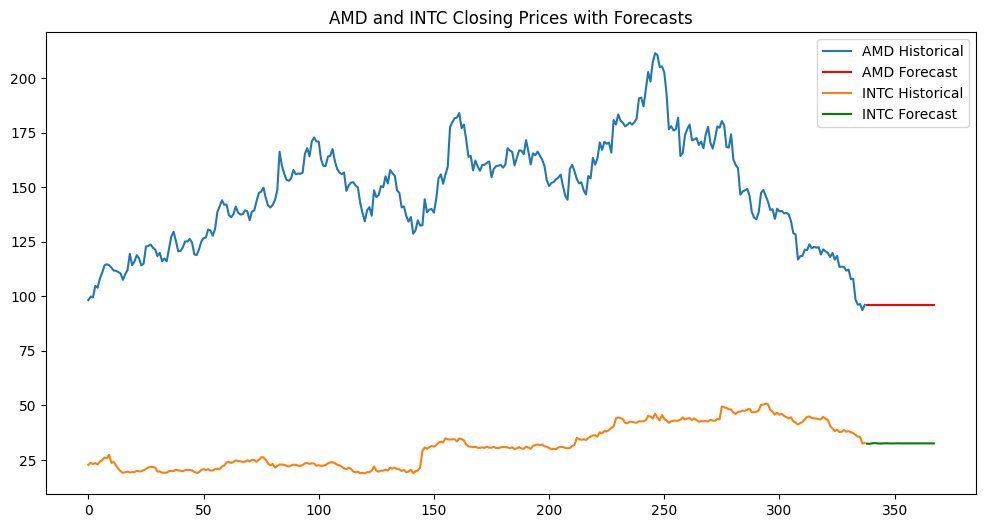

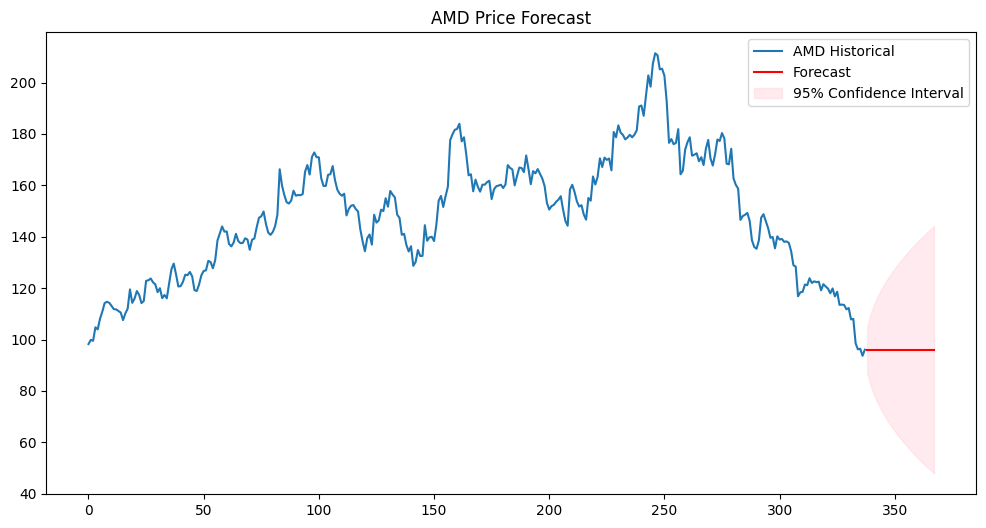

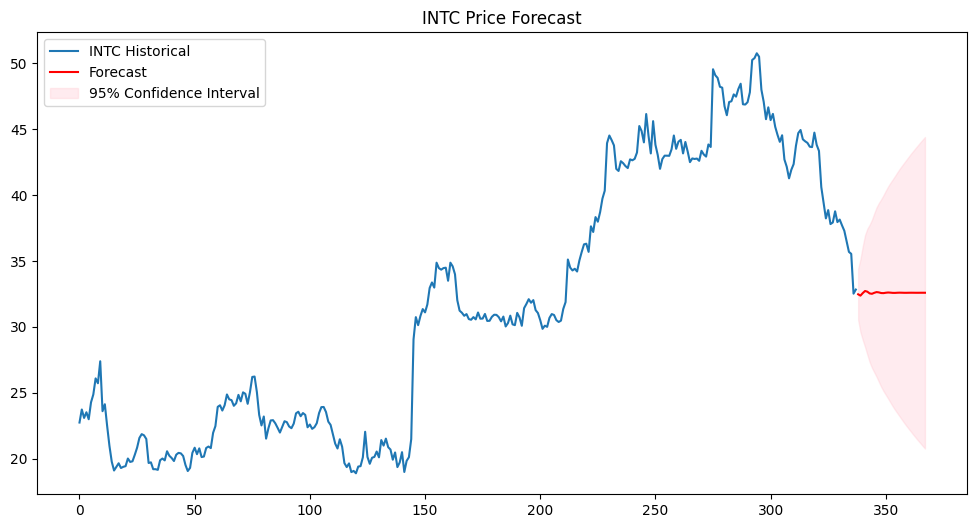


AMD Forecast Values (next 5 periods):
338    96.055
339    96.055
340    96.055
341    96.055
342    96.055
Name: predicted_mean, dtype: float64

INTC Forecast Values (next 5 periods):
338    32.471462
339    32.370162
340    32.561943
341    32.721555
342    32.669400
Name: predicted_mean, dtype: float64


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Upload Excel files
print("Please upload AMD Excel file")
amd_upload = files.upload()
amd_filename = list(amd_upload.keys())[0]
amd_df = pd.read_excel(amd_filename)

print("Please upload INTC Excel file")
intc_upload = files.upload()
intc_filename = list(intc_upload.keys())[0]
intc_df = pd.read_excel(intc_filename)

# Print available columns
print("\nAMD DataFrame columns:", list(amd_df.columns))
print("INTC DataFrame columns:", list(intc_df.columns))

# Ask user for the correct column name
close_column = input("Please enter the column name containing closing prices: ")

# Extract closing prices using user-specified column name
try:
    amd_close = amd_df[close_column]
    intc_close = intc_df[close_column]
except KeyError:
    print(f"Error: Column '{close_column}' not found in one or both DataFrames")
    print("Please check the column names and try again")
    raise

# Ensure both series have the same length
min_length = min(len(amd_close), len(intc_close))
amd_close = amd_close[:min_length]
intc_close = intc_close[:min_length]

# Function for unit root tests
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')

    # KPSS Test
    kpss_result = kpss(series, regression='c')  # 'c' for constant
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')

# Perform unit root tests
unit_root_tests(amd_close, "AMD")
unit_root_tests(intc_close, "INTC")

# Cointegration test
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")

    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"r = {i}: Cointegration exists at 95% confidence level")
        else:
            print(f"r = {i}: No cointegration at 95% confidence level")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'AMD': amd_close,
    'INTC': intc_close
}).dropna()
cointegration_test(coint_df)

# Function to find best ARIMA model
def find_best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    return best_order

# Find and fit best ARIMA models
amd_order = find_best_arima(amd_close, "AMD")
intc_order = find_best_arima(intc_close, "INTC")

# Fit final ARIMA models
amd_model = ARIMA(amd_close, order=amd_order).fit()
intc_model = ARIMA(intc_close, order=intc_order).fit()

# Forecast next 30 periods
forecast_steps = 30
amd_forecast = amd_model.forecast(steps=forecast_steps)
intc_forecast = intc_model.forecast(steps=forecast_steps)

# Create forecast index (assuming daily data)
last_index = len(amd_close) - 1
forecast_index = range(last_index + 1, last_index + 1 + forecast_steps)

# Plot original series with forecasts
plt.figure(figsize=(12,6))
plt.plot(amd_close, label='AMD Historical')
plt.plot(forecast_index, amd_forecast, label='AMD Forecast', color='red')
plt.plot(intc_close, label='INTC Historical')
plt.plot(forecast_index, intc_forecast, label='INTC Forecast', color='green')
plt.title('AMD and INTC Closing Prices with Forecasts')
plt.legend()
plt.show()

# Plot detailed forecast with confidence intervals
def plot_forecast(model, series, name, steps=30):
    forecast_obj = model.get_forecast(steps=steps)
    forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    forecast_index = range(len(series), len(series) + steps)

    plt.figure(figsize=(12,6))
    plt.plot(series, label=f'{name} Historical')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                    conf_int.iloc[:, 0],
                    conf_int.iloc[:, 1],
                    color='pink',
                    alpha=0.3,
                    label='95% Confidence Interval')
    plt.title(f'{name} Price Forecast')
    plt.legend()
    plt.show()

# Generate detailed forecast plots
plot_forecast(amd_model, amd_close, "AMD")
plot_forecast(intc_model, intc_close, "INTC")

# Print forecast values
print("\nAMD Forecast Values (next 5 periods):")
print(amd_forecast[:5])
print("\nINTC Forecast Values (next 5 periods):")
print(intc_forecast[:5])

Please upload AMD Excel file


Saving AMD.xlsx to AMD (2).xlsx
Please upload INTC Excel file


Saving INTC.xlsx to INTC (2).xlsx

AMD DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
INTC DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
Please enter the column name containing closing prices:  Close

Unit Root Tests for AMD:
ADF Test:
ADF Statistic: -1.6869
p-value: 0.4379
Critical Values: {'1%': -3.4499043309021955, '5%': -2.870154885338925, '10%': -2.5713597190254385}
Interpretation:
  - p-value >= 0.05: Fail to reject null - AMD may be non-stationary

KPSS Test:
KPSS Statistic: 0.7111
p-value: 0.0125
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Interpretation:
  - p-value < 0.05: Reject null hypothesis - AMD is non-stationary

Unit Root Tests for INTC:
ADF Test:
ADF Statistic: -1.1420
p-value: 0.6980
Critical Values: {'1%': -3.4499043309021955, '5%': -2.870154885338925, '10%': -2.5713597190254385}
Interpretation:
  - p-value >= 0.05: Fail to reject null - INTC may be non-stationary

KPSS Test:
KPSS

<ipython-input-3-9785cd238fa2>:60: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c')  # 'c' for constant
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.


Best ARIMA model for AMD:
Order: (0, 1, 0)
AIC: 1969.13
Interpretation:
  - p=0: 0 autoregressive term(s)
  - d=1: 1 difference(s) needed for stationarity
  - q=0: 0 moving average term(s)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/sta


Best ARIMA model for INTC:
Order: (2, 1, 2)
AIC: 958.17
Interpretation:
  - p=2: 2 autoregressive term(s)
  - d=1: 1 difference(s) needed for stationarity
  - q=2: 2 moving average term(s)


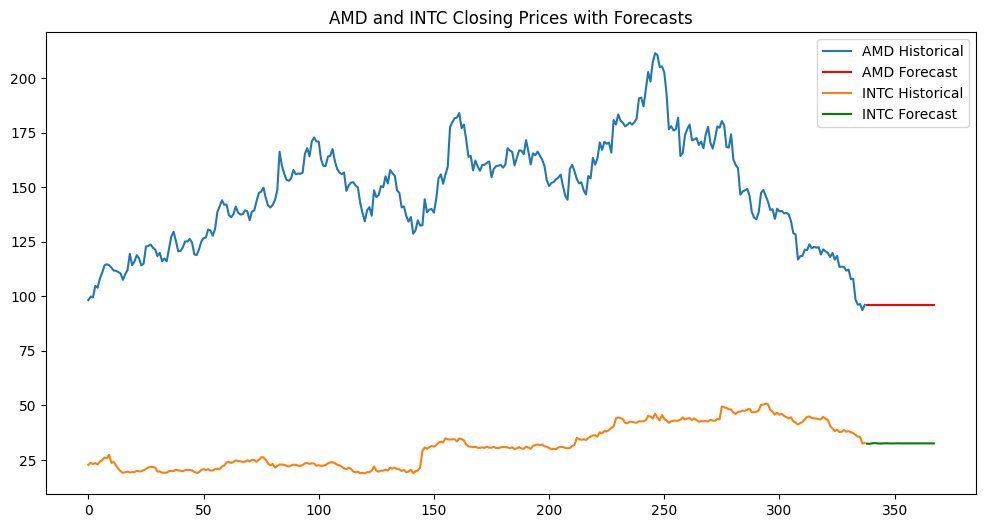

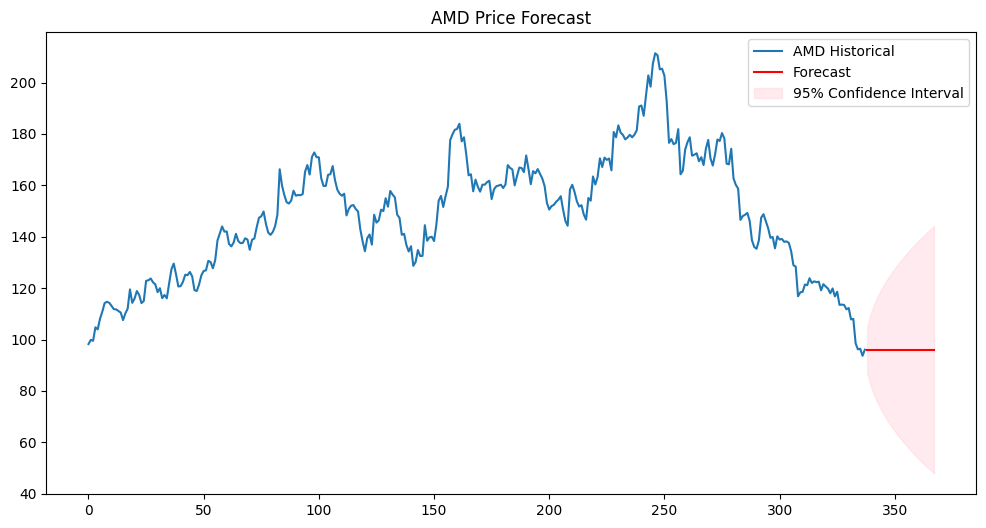


Forecast Interpretation for AMD:
Last observed value: 96.06
Average forecast value: 96.05
Forecast change: -0.00
Trend: Downward forecast trend
95% CI range at period 30: [47.96, 144.15]


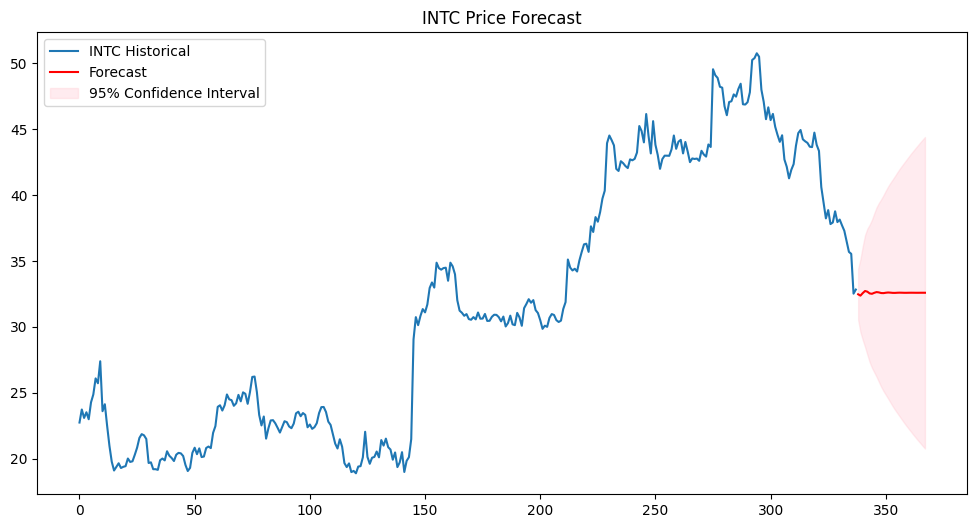


Forecast Interpretation for INTC:
Last observed value: 32.83
Average forecast value: 32.58
Forecast change: -0.25
Trend: Downward forecast trend
95% CI range at period 30: [20.77, 44.41]

AMD Forecast Values (next 5 periods):
338    96.055
339    96.055
340    96.055
341    96.055
342    96.055
Name: predicted_mean, dtype: float64

INTC Forecast Values (next 5 periods):
338    32.471462
339    32.370162
340    32.561943
341    32.721555
342    32.669400
Name: predicted_mean, dtype: float64


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Upload Excel files
print("Please upload AMD Excel file")
amd_upload = files.upload()
amd_filename = list(amd_upload.keys())[0]
amd_df = pd.read_excel(amd_filename)

print("Please upload INTC Excel file")
intc_upload = files.upload()
intc_filename = list(intc_upload.keys())[0]
intc_df = pd.read_excel(intc_filename)

# Print available columns
print("\nAMD DataFrame columns:", list(amd_df.columns))
print("INTC DataFrame columns:", list(intc_df.columns))

# Ask user for the correct column name
close_column = input("Please enter the column name containing closing prices: ")

# Extract closing prices using user-specified column name
try:
    amd_close = amd_df[close_column]
    intc_close = intc_df[close_column]
except KeyError:
    print(f"Error: Column '{close_column}' not found in one or both DataFrames")
    print("Please check the column names and try again")
    raise

# Ensure both series have the same length
min_length = min(len(amd_close), len(intc_close))
amd_close = amd_close[:min_length]
intc_close = intc_close[:min_length]

# Function for unit root tests with interpretation
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')
    print("Interpretation:")
    if adf_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be non-stationary")

    # KPSS Test
    kpss_result = kpss(series, regression='c')  # 'c' for constant
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')
    print("Interpretation:")
    if kpss_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is non-stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be stationary")

# Perform unit root tests
unit_root_tests(amd_close, "AMD")
unit_root_tests(intc_close, "INTC")

# Cointegration test with interpretation
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")
    print("Interpretation:")
    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"  - r = {i}: Cointegration exists at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) > 95% critical value ({result.cvt[i, 1]:.2f})")
        else:
            print(f"  - r = {i}: No cointegration at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) <= 95% critical value ({result.cvt[i, 1]:.2f})")
    if result.lr1[0] > result.cvt[0, 1]:
        print("Conclusion: AMD and INTC are cointegrated - they share a long-run equilibrium relationship")
    else:
        print("Conclusion: No evidence of cointegration between AMD and INTC")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'AMD': amd_close,
    'INTC': intc_close
}).dropna()
cointegration_test(coint_df)

# Function to find best ARIMA model with interpretation
def find_best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    print("Interpretation:")
    print(f"  - p={best_order[0]}: {best_order[0]} autoregressive term(s)")
    print(f"  - d={best_order[1]}: {best_order[1]} difference(s) needed for stationarity")
    print(f"  - q={best_order[2]}: {best_order[2]} moving average term(s)")
    return best_order

# Find and fit best ARIMA models
amd_order = find_best_arima(amd_close, "AMD")
intc_order = find_best_arima(intc_close, "INTC")

# Fit final ARIMA models
amd_model = ARIMA(amd_close, order=amd_order).fit()
intc_model = ARIMA(intc_close, order=intc_order).fit()

# Forecast next 30 periods
forecast_steps = 30
amd_forecast = amd_model.forecast(steps=forecast_steps)
intc_forecast = intc_model.forecast(steps=forecast_steps)

# Create forecast index
last_index = len(amd_close) - 1
forecast_index = range(last_index + 1, last_index + 1 + forecast_steps)

# Plot original series with forecasts
plt.figure(figsize=(12,6))
plt.plot(amd_close, label='AMD Historical')
plt.plot(forecast_index, amd_forecast, label='AMD Forecast', color='red')
plt.plot(intc_close, label='INTC Historical')
plt.plot(forecast_index, intc_forecast, label='INTC Forecast', color='green')
plt.title('AMD and INTC Closing Prices with Forecasts')
plt.legend()
plt.show()

# Detailed forecast plot with confidence intervals and interpretation
def plot_forecast(model, series, name, steps=30):
    forecast_obj = model.get_forecast(steps=steps)
    forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    forecast_index = range(len(series), len(series) + steps)

    plt.figure(figsize=(12,6))
    plt.plot(series, label=f'{name} Historical')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                    conf_int.iloc[:, 0],
                    conf_int.iloc[:, 1],
                    color='pink',
                    alpha=0.3,
                    label='95% Confidence Interval')
    plt.title(f'{name} Price Forecast')
    plt.legend()
    plt.show()

    # Forecast interpretation
    last_value = series.iloc[-1]
    mean_forecast = forecast.mean()
    print(f"\nForecast Interpretation for {name}:")
    print(f"Last observed value: {last_value:.2f}")
    print(f"Average forecast value: {mean_forecast:.2f}")
    print(f"Forecast change: {mean_forecast - last_value:.2f}")
    if mean_forecast > last_value:
        print("Trend: Upward forecast trend")
    elif mean_forecast < last_value:
        print("Trend: Downward forecast trend")
    else:
        print("Trend: Flat forecast trend")
    print(f"95% CI range at period {steps}: [{conf_int.iloc[-1, 0]:.2f}, {conf_int.iloc[-1, 1]:.2f}]")

# Generate detailed forecast plots and interpretations
plot_forecast(amd_model, amd_close, "AMD")
plot_forecast(intc_model, intc_close, "INTC")

# Print forecast values
print("\nAMD Forecast Values (next 5 periods):")
print(amd_forecast[:5])
print("\nINTC Forecast Values (next 5 periods):")
print(intc_forecast[:5])

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")